# Sensible heat flux at the surface ($H$)

$$
C_{soil} \frac{\partial T_{s}}{\partial t} = (1-\alpha) \cdot SW_d + LW_d - LW_u \ - \textcolor{red}{H} - \lambda E - G      \tag{1.2}
$$

- **Definition**: The rate of heat transfer per unit area by turbulence.

- **Equation**:

$$
H = - \rho c_p K \frac{\partial T}{\partial z}      \tag{6.1}
$$

where $\rho$ is the air density, $c_p$ is the specific heat at constant pressure, and $K$ is the thermal diffusivity [m<sup>2</sup>/s<sup>1</sup>].

<br>
<br>

Eq. 6.1 can be rewritten as,

$$
dT = - \frac{1}{\rho c_p} \frac{H}{K} dz        \tag{6.2}
$$

<br>

Then, integrate Eq. 6.2 from the roughness length ($z_0$) to the model lowest layer ($z_r$),

$$
\int_{T(z=z_0)}^{T(z=z_r)} dT = - \frac{H}{\rho c_p} \int_{z_0}^{z_r} \frac{1}{K} dz        \tag{6.3}
$$

where $T(z=z_0)$ can be approximated as $T_s$, and $T(z=z_r)$ can be replaced with $T_a$.

<br>
<br>

Rearrange again,

$$
T_a - T_s = - \frac{H}{\rho c_p} \textcolor{red}{\int_{z_0}^{z_r} \frac{1}{K} dz}        \tag{6.4}
$$

<br>

Here, we introduce the aerodynamic resistance $r_h$ as

$$
r_h = \int_{z_0}^{z_r} \frac{1}{K} dz       \tag{6.5}
$$

<br>
<br>

Replace the term in Eq. 6.4 by Eq. 6.5, we get

$$
T_a - T_s = - \frac{H}{\rho c_p} \textcolor{red}{r_h}        \tag{6.6}
$$

<br>
<br>

Rearranging Eq. 6.6, we get the expression for $H$

$$
H = \frac{\rho c_p (T_s - T_a)}{r_h}        \tag{6.7}
$$


<br>
<br>
<hr>

### Aerodynamic resistance ($r_h$)


- $r_h$ is the same concept as **the electrical resistance** in physics.
- **Ohm's Law**:

$$
I = \frac{V_{AB}}{R}    \tag{6.8}
$$

where $I$ is the flow of electron, $V_{AB}$, and $R$ is the electrical resistance, representing how difficult for electric current to flow.

<!-- - $R$ $\propto$ $\frac{1}{\textrm{area}}$, $\textrm{length}$

<figure>
  <img src="../../../images/sensible_heat_flux_01.png" style="width:80%">
</figure> -->


- Comparison between the electrical resistance and aerodynamic resistance:

<figure>
  <img src="../_static/images/sensible_heat_flux_02.png" style="width:80%">
</figure>

<!-- - In the model, we always assume unit area &#8594; $r_h$ $\propto$ $\textrm{length}$ -->



<br>
<br>
<hr>

##### How to calculate $r_h$ in LSM

- Within the surface layer (bottom 10% of planetary boundary layer), through observations and scaling analysis in neutral stability conditions, the following relationship has been found:

$$
K = k z u_*     \tag{6.9}
$$
where $z$ is the height, $u_*$ is the friction velocity (=$(\overline{u'w'})^{0.5}$), $k$ is the von Karman constant.

<br>

- With Eq. 6.9, solve Eq. 6.5,

$$
r_h = \int_{z_0}^{z_r} \frac{1}{K} dz = \int_{z_0}^{z_r} \frac{1}{kzu_*} dz = \frac{1}{ku_*} \int_{z_0}^{z_r} \frac{dz}{z}      \tag{6.10}
$$

<br>

- Finally, we get 

$$
r_h = \frac{1}{ku_*} \textrm{ln} \left( \frac{z_r}{z_0} \right)     \tag{6.11}
$$

<br>

`````{admonition} Several assumptions are used,
:class: tip

1) Changes in $H$, $\lambda E$, & momentum flux ($\tau$) are less than 10% within the surface layer.
1) Mean flow is one-dimensional.
1) Coriolis and pressure gradient forces are negligible.
`````

`````{admonition} In unstable/stable stability condition

- Wind:       $U_{stable} < U_{neutral} < U_{unstable}$
- Mixing:     $\tau_{stable} < \tau_{neutral} < \tau_{unstable}$
- Resistance:  $r_{stable} > r_{neutral} > r_{unstable}$

<figure>
  <img src="../_static/images/wind_profile_in_diff_stability.png" alt="Wind profile in diff. stability" style="width:50%">
  <figcaption>Figure 6.1. Illustration of mean wind profile in stable, neutral, and unstable stability conditions.</figcaption>
</figure>
`````
({cite:p}`stensrud2007parameterization`)

<br>
<br>

- The effect of stability is represented by the correction terms ($\textcolor{purple}{\psi_h}$) with the length scale ($\textcolor{green}{L}$). However, a detail description of the stability correction will not be discussed in this lecture.

$$
r_h = \frac{1}{ku_*} \left[ \textrm{ln} \left( \frac{z_r}{z_0} \right) - \textcolor{purple}{\psi_h}(\frac{z_r}{\textcolor{green}{L}}) + \textcolor{purple}{\psi_h}(\frac{z_0}{\textcolor{green}{L}})  \right]  \tag{6.12}
$$

<br>
<br>
<hr>

##### How to calculate $u_*$ in LSM
- We need to know $\textcolor{red}{u_*}$ to compute $\textcolor{orange}{r_h}$ and thus to compute $\textcolor{blue}{H}$.

- Through observations and scaling analysis, the following wind profile relationship has been found:

$$
\frac{\overline{u}(z_r)}{\textcolor{red}{u_*}} = \frac{1}{k} \left[ \textrm{ln} \left( \frac{z_r}{z_0} \right) - \textcolor{purple}{\psi_m}(\frac{z_r}{\textcolor{green}{L}}) + \textcolor{purple}{\psi_m}(\frac{z_0}{\textcolor{green}{L}})  \right]      \tag{6.13}
$$

<br>

- Rewrite Eq. 6.13 and then we get 

$$
\textcolor{red}{u_*} = \frac{k \overline{u}(z_r)}{ \left[ \textrm{ln} \left( \frac{z_r}{z_0} \right) - \textcolor{purple}{\psi_m}(\frac{z_r}{\textcolor{green}{L}}) + \textcolor{purple}{\psi_m}(\frac{z_0}{\textcolor{green}{L}})  \right] }      \tag{6.14}
$$

<br>

- Then, we have to know $L$:

$$
\textcolor{green}{L} = - \frac{ \textcolor{red}{u_*^3}}{k\frac{g}{T_0} \frac{ \textcolor{blue}{H}}{\rho c_p}}       \tag{6.15}
$$

where $T_0$ is the temperature scaling.


<br>

`````{admonition} Accordingly,
:class: danger

- We need to know $\textcolor{red}{u_*}$ and $\textcolor{blue}{H}$ to calculate $\textcolor{red}{u_*}$, and ultimately $\textcolor{blue}{H}$. 🤨
- This means... it's impossible to calculate $\textcolor{red}{u_*}$, $\textcolor{orange}{r_h}$, and as well as $\textcolor{blue}{H}$. 🤯
`````

<br>

- To avoid this problem, we relates $\textcolor{green}{L}$ to the bulk Richardson number ($Ri_b$) as found in the observation {cite:p}`izumi1971kansas`


$$
Ri_b = \frac{z}{\textcolor{green}{L}} \frac{\textrm{ln} \left( \frac{z}{z_0} \right) - \textcolor{purple}{\psi_h}(\frac{z}{\textcolor{green}{L}})}{\left[\textrm{ln} \left( \frac{z}{z_0} \right) - \textcolor{purple}{\psi_m}(\frac{z}{\textcolor{green}{L}}) \right] ^2}    \tag{6.16}
$$

<br>

- Using $Ri_b$ calculate $\textcolor{red}{u_*}$, $\textcolor{orange}{r_h}$, and $\textcolor{blue}{H}$ with the following steps:

<figure>
  <img src="../_static/images/sensible_heat_flux_04.png">
</figure>

<br>
<br>
<br>
<hr>

### Practice 6.1
Compute $r_h$ and $H$ using observed atmospheric variables at Daegu ASOS station from 01 to 04 April 2012. Assume that 

1) Use observed variables for $T_a$, $T_s$<sup><a href="#footnote-1">*</a></sup>, $U$, $SW_d$
1) $z_r$ is 20 m
1) $z_0$ is 0.15 m

<a name="footnote-1">*</a> $T_s$ 값이 너무 튀기때문에 $T_s = T_s * 0.2 + T_a * 0.8$로 사용하세요.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import function_package as fp

In [3]:
ASOS = xr.open_dataset('../data/ASOS_processed_2012033100-2012041000.nc')
ASOS_Daegu = ASOS.sel(STN=143) # Daegu station
ASOS_Daegu = ASOS_Daegu.sel(time=slice('2012-04-01 00:00', '2012-04-05 00:00'))
ASOS_Daegu

<xarray.Dataset> Size: 33kB
Dimensions:  (time: 97)
Coordinates:
  * time     (time) datetime64[ns] 776B 2012-04-01 ... 2012-04-05
    STN      float64 8B 143.0
Data variables: (12/45)
    WD       (time) float64 776B ...
    WS       (time) float64 776B ...
    GST      (time) float64 776B ...
    GST.1    (time) float64 776B ...
    GST.2    (time) float64 776B ...
    PA       (time) float64 776B ...
    ...       ...
    BF       (time) float64 776B ...
    IR       (time) float64 776B ...
    IX       (time) float64 776B ...
    LON      float64 8B ...
    LAT      float64 8B ...
    Height   float64 8B ...
Attributes:
    CDI:          Climate Data Interface version 2.5.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Jun 22 18:20:55 2025: cdo seldate,2012-03-31,2012-04-10...
    CDO:          Climate Data Operators version 2.5.0 (https://mpimet.mpg.de...

In [4]:
# Assign observed variables
Ta         = ASOS_Daegu['TA'] + 273.15          # Convert C to K
Ts         = ASOS_Daegu['TS'] + 273.15          # Convert C to K
Pa         = ASOS_Daegu['PA'] * 100.            # Convert hPa to Pa
wind_speed = ASOS_Daegu['WS']                   # m/s
SWd        = ASOS_Daegu['SI'] * 1.0e6   / 3600  # Convert MJ/m2 to W/m2
SWd        = xr.where(SWd < 0, 0, SWd)          # Set negative SWd to 0


# Interpolate hourly data to minutely data to avoid numerical instability
minutely_time = pd.date_range(
    start=Ta.time[0].item(), 
    end=Ta.time[-1].item(), 
    freq='1min'
)

Ta = Ta.interp(time=minutely_time)
Ts = Ts.interp(time=minutely_time)
wind_speed = wind_speed.interp(time=minutely_time)
Pa = Pa.interp(time=minutely_time)
SWd = SWd.interp(time=minutely_time)

rho        = Pa / (fp.R_D * Ta) # kg/m3


# Setup
zr = 20.0 # height of the model lowest layer [m]
z0 = 0.15 # roughness length [m]

Ts = (Ts) * 0.2 + Ta * 0.8 # Blend air and surface temperature as surface temperature is too spiky

<br>
<br>

Check Observed variables:

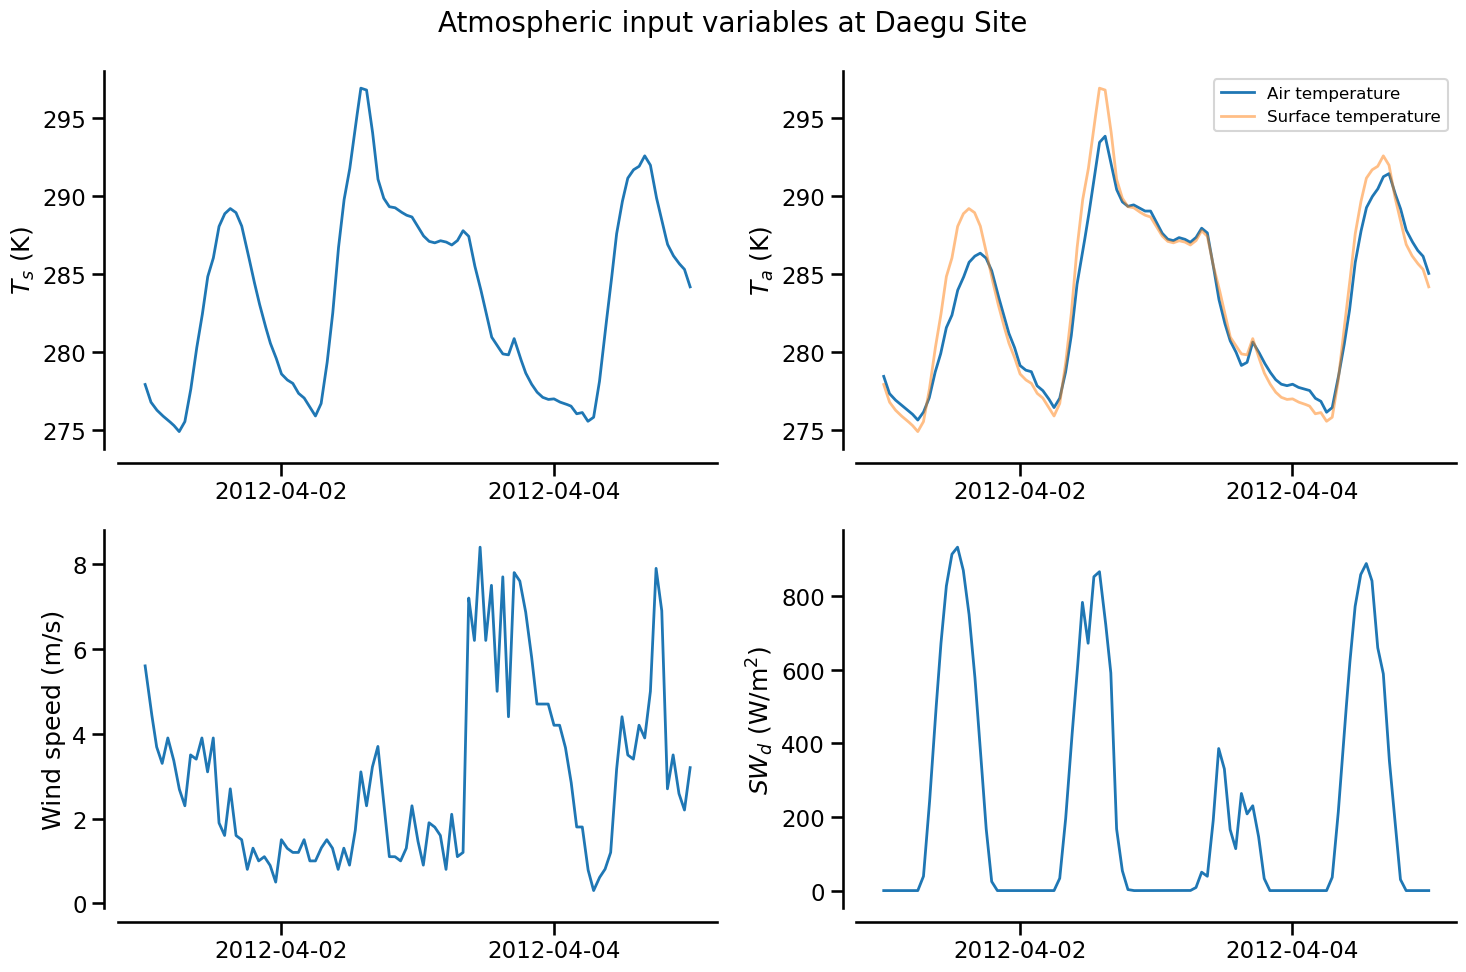

In [5]:
# plot

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


sns.set_context('talk')
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

fig.suptitle('Atmospheric input variables at Daegu Site', fontsize=20)
time_info = Ta['time'].values

# surface temperature
ax[0,0].plot(time_info, Ts, linewidth=2)
ax[0,0].set_ylabel('$T_s$ (K)', fontsize=18)

# air temperature
ax[0,1].plot(time_info, Ta, linewidth=2, c='C0', label='Air temperature')
ax[0,1].plot(time_info, Ts, linewidth=2, c='C1', label='Surface temperature', alpha=0.5)
ax[0,1].set_ylabel('$T_a$ (K)', fontsize=18)
ax[0,1].legend(fontsize=12)

# wind speed
ax[1,0].plot(time_info, wind_speed, linewidth=2)
ax[1,0].set_ylabel('Wind speed (m/s)', fontsize=18)

# Downward shortwave radiation
ax[1,1].plot(time_info, SWd, linewidth=2)
ax[1,1].set_ylabel('$SW_d$ (W/m$^2$)', fontsize=18)

# # properties
for i in range(2):
    for j in range(2):
        ax[i,j].xaxis.set_major_locator(mdates.DayLocator(interval=2))

sns.despine(offset=10)
plt.tight_layout()

<br>
<br>
<hr>

##### ① atmospheric variables &#8594; $Ri_b$

<figure>
  <img src="../_static/images/sensible_heat_flux_04.png">
</figure>

<br>
<br>

$$
Ri_b = \frac{g}{\theta_a} \frac{\theta_a - \theta_s}{\overline{u}} z    \tag{6.17}
$$

In [6]:
def calculate_bulk_richardson_number(Ts, Ta, Pa, wind_speed, zr):
    '''
    Adapted lines from revise MM5 surface-layer scheme.
    Input:
        Ta: air temperature [K]
        Pa: air pressure [Pa]
        wind_speed: wind speed [m/s]
        zr: the height of the model lowest layer [m]
    '''
    # Constants from function_package.py
    # G   = 9.81               # Gravitational acceleration [m/s2]
    # P_1000mb = 100000.0      # Pressure at 1000 mb [Pa]
    # P_SFC    = 101300.0      # Surface pressure [Pa]
    # R_D = 287.0              # Gas constant of dry air [J/K/kg]
    # C_P = 7.0 * R_D / 2.0    # the specific heat at constant pressure
    # R_OVER_C_P = R_D / C_P

    theta_a_conversion = ( fp.P_1000mb / Pa) ** fp.R_OVER_C_P
    theta_a = Ta * theta_a_conversion

    # Assume surface pressure is 1013 hPa
    theta_s_conversion = ( fp.P_1000mb / fp.P_SFC) ** fp.R_OVER_C_P
    theta_s = Ts * theta_s_conversion
    
    dtheta = theta_a - theta_s 

    g_over_theta_a = fp.G / theta_a
    
    Rib = g_over_theta_a * zr * dtheta / (wind_speed**2)

    return Rib

In [7]:
# Calculate bulk Richardson number

Rib = calculate_bulk_richardson_number(Ts, Ta, Pa, wind_speed, zr)

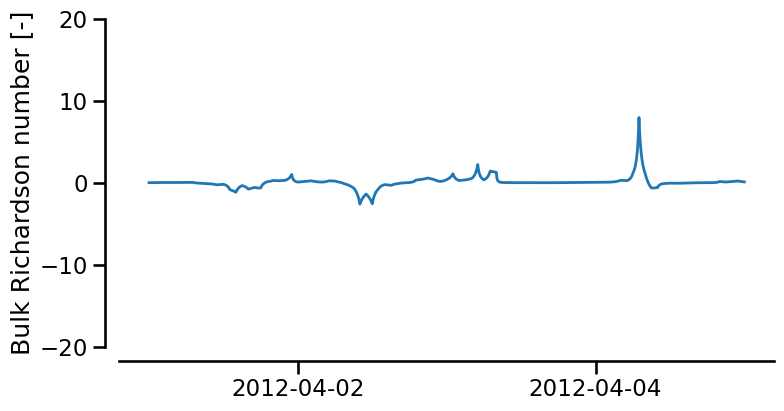

In [8]:
# plot

sns.set_context('talk')
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))

### bulk Richardson number
ax[0,0].plot(Rib['time'], Rib, linewidth=2)
ax[0,0].set_ylim(-20, 20)
ax[0,0].set_ylabel('Bulk Richardson number [-]', fontsize=18)
ax[0,0].xaxis.set_major_locator(mdates.DayLocator(interval=2))

ax[0,1].set_visible(False)
ax[1,0].set_visible(False)
ax[1,1].set_visible(False)

sns.despine(offset=10)
plt.tight_layout()

<br>
<br>
<br>
<hr>

##### ② $Ri_b$ &#8594; $z/L$

<figure>
  <img src="../_static/images/sensible_heat_flux_04.png">
</figure>

<br>

$$
Ri_b = \frac{z}{\textcolor{green}{L}} \frac{\textrm{ln} \left( \frac{z}{z_0} \right) - \textcolor{purple}{\psi_h}(\frac{z}{\textcolor{green}{L}})}{\left[\textrm{ln} \left( \frac{z}{z_0} \right) - \textcolor{purple}{\psi_m}(\frac{z}{\textcolor{green}{L}}) \right] ^2}    \tag{6.16}
$$

In [9]:
wind_speed_np = wind_speed.values
Rib_np        = Rib.values
z_over_L      = np.zeros_like(Rib_np)

for n, RiB_n in enumerate(Rib_np):

    ### Neutral
    if RiB_n == 0.0:
        z_over_L[n] = 0.0

    ### Stable or unstable
    else:
        z_over_L[n] = fp.calculate_z_over_L(RiB_n, zr, z0)

<br>
<br>
<br>
<hr>

##### ③ $z/L$ &#8594; $\psi_m$, $\psi_h$

<figure>
  <img src="../_static/images/sensible_heat_flux_04.png">
</figure>

- Stable:

$$
\psi_m = \psi_h = -10 \textrm{ln} \left( \frac{z_r}{z_0} \right)      \tag{6.18}
$$

<br>
<br>

- Unstable:

$$
\psi_m = 2 \textrm{ln} \left( \frac{1+x}{2} \right) + \textrm{ln} \left( \frac{1+x^2}{2} \right) - 2 \textrm{tan}^{-1} x + \frac{\pi}{2}     \tag{6.19}
$$

$$
\psi_h = 2 \textrm{ln} \left( \frac{1+x^2}{2} \right)      \tag{6.20}
$$

where $x = [1-16(z_r/L)] ^ {1/4}$

In [10]:
KARMAN = 0.4 # von Karman constant

# Initialize variables
z0_over_L  = z_over_L / zr * z0
psi_m, psi_h = np.zeros_like(Rib_np), np.zeros_like(Rib_np)


for n, br_n in enumerate(Rib_np):
    if br_n == 0.0:     # Neutral
        psi_m[n] = 0.0
        psi_h[n] = 0.0
    
    elif br_n > 0:      # Stable
        psi_m[n] = fp.calculate_psim_stable(z_over_L[n]) - fp.calculate_psim_stable(z0_over_L[n])
        psi_h[n] = fp.calculate_psih_stable(z_over_L[n]) - fp.calculate_psih_stable(z0_over_L[n])
    
    elif br_n < 0:      # Unstable
        psi_m[n] = fp.calculate_psim_unstable(z_over_L[n]) - fp.calculate_psim_unstable(z0_over_L[n])
        psi_h[n] = fp.calculate_psih_unstable(z_over_L[n]) - fp.calculate_psih_unstable(z0_over_L[n])


<br>
<br>
<br>
<hr>

##### ④ $\psi_m$, $\psi_h$ &#8594; $u_*$

<figure>
  <img src="../_static/images/sensible_heat_flux_04.png">
</figure>

<br>
<br>

$$
u_* = \frac{k \overline{u}(z_r)}{ \left[ \textrm{ln}\left( \frac{z_r}{z_0} \right) - \psi_m(\frac{z_r}{L}) + \textcolor{gray}{\psi_m(\frac{z_0}{L})}  \right] }      \tag{6.14}
$$

In [11]:
zr_over_z0 = zr / z0

ust = np.zeros_like(Rib_np)
ust = KARMAN * wind_speed / (np.log(zr_over_z0) - psi_m)
diagnosed_ust = ust

<br>
<br>
<br>
<hr>

##### ⑤ $u_*$ &#8594; $r_h$

<figure>
  <img src="../_static/images/sensible_heat_flux_04.png">
</figure>

<br>
<br>

$$
r_h = \frac{1}{ku_*} \left[ \textrm{ln} \left( \frac{z_r}{z_0} \right) - \psi_h(\frac{z_r}{L}) + \textcolor{gray}{\psi_h(\frac{z_0}{L})}  \right]  \tag{6.12}
$$

In [12]:
rh = np.zeros_like(Rib_np)
rh = 1/(KARMAN * ust) * ( np.log(zr_over_z0) - psi_h )
diagnosed_rh = rh

<br>
<br>
<br>
<hr>

##### ⑥ $r_h$ &#8594; $H$

<figure>
  <img src="../_static/images/sensible_heat_flux_04.png">
</figure>


<br>
<br>

Finally recall Eq. 6.7,

$$
H = \frac{\rho c_p (T_s - T_a)}{r_h}        \tag{6.7}
$$

In [13]:
H = np.zeros_like(Rib_np)
H = rho * fp.C_P * (Ts - Ta) / rh
diagnosed_H = H

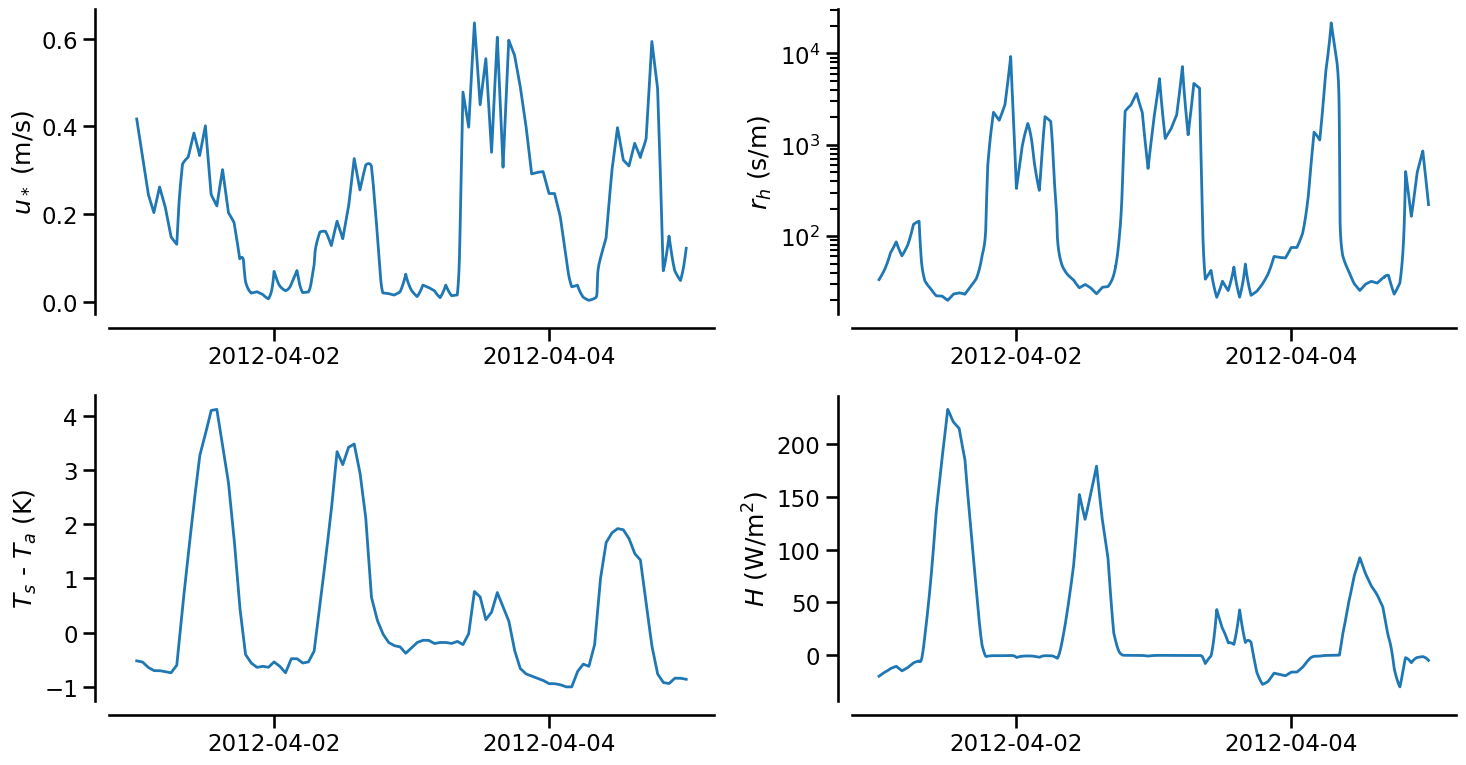

In [14]:
# plot

sns.set_context('talk')
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))

time_info = Ta['time'].values

### Friction velocity
ax[0,0].plot(time_info, ust, linewidth=2)
ax[0,0].set_ylabel('$u_*$ (m/s)', fontsize=18)

### Aerodynamic resistance
ax[0,1].plot(time_info, rh, linewidth=2)
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('$r_h$ (s/m)', fontsize=18)

### Temperature difference
ax[1,0].plot(time_info, Ts - Ta, linewidth=2)
ax[1,0].set_ylabel('$T_s$ - $T_a$ (K)', fontsize=18)

### Sensible Heat flux
ax[1,1].plot(time_info, H, linewidth=2)
ax[1,1].set_ylabel('$H$ (W/m$^2$)', fontsize=18)


### properties
for i in range(2):
    for j in range(2):
        ax[i,j].xaxis.set_major_locator(mdates.DayLocator(interval=2))

sns.despine(offset=10)
plt.tight_layout()

<br>
<br>
<br>
<hr>

### Practice 6.2
Predict $T_s$ at Daegu ASOS station in April 2012 using observed atmospheric variables and Compare prediced $T_s$ to observed $T_s$. Assume that

1) Observed variables contain $T_a$, $U$, & $SW_d$
1) $z_r$ is 20 m
1) $z_0$ is 0.15 m
1) $T_s$ at initial time is set to observed $T_s$
1) $C_{soil}$ is $c_{soil} \cdot d_s$, where $c_{soil}$ is heat capacity of soil (2.0 $\times$ 10<sup>6</sup> J/m<sup>3</sup>/K) and $d_s$ is depth of soil (0.07 m)
1) $\alpha$ is 0.3
1) $LW_d$ is 400 W/m<sup>2</sub>
1) $\lambda E$ is 30% of $SW_d$
1) $G$ is 0 W/m<sup>2</sub>

&#8594; Predict $\textcolor{red}{T_s}$, $\textcolor{red}{LW_u}$, $\textcolor{red}{H}$ by prescribing $SW_d$, $LW_d$, $\lambda E$, $G$:

$$
C_{soil} \textcolor{red}{\frac{\partial T_{s}}{\partial t}} = (1-\alpha) \cdot SW_d + LW_d - \textcolor{red}{LW_u} - \textcolor{red}{H} - \lambda E - G       \tag{1.2}
$$


In [15]:
# Setup
dt = 60 # s

LWd = 400       # W/m2
LE  = 0.3 * SWd # W/m2
G   = 0.0       # W/m2

In [ ]:
# Predict Ts

time_dimension_size = len(Ts)

### Create an array for Ts
predicted_Ts  = np.zeros(time_dimension_size)
predicted_ust = np.zeros(time_dimension_size)
predicted_rh  = np.zeros(time_dimension_size)
predicted_H   = np.zeros(time_dimension_size)

### Initial value of Ts
predicted_Ts[0] = Ts.isel(time=0).values

from tqdm import tqdm
for n in tqdm(np.arange(1, time_dimension_size), desc='Predicting surface temperature'):

    ### ①
    Rib = calculate_bulk_richardson_number(predicted_Ts[n-1], Ta[n-1], Pa[n-1], wind_speed[n-1], zr)

    ### ②
    if Rib == 0.0:
        z_over_L = 0.0
    else:
        z_over_L = fp.calculate_z_over_L(Rib, zr, z0)

    ### ③
    z0_over_L  = z_over_L / zr * z0
    
    if Rib == 0.0:     # Neutral
        psi_m = 0.0
        psi_h = 0.0
    
    elif Rib > 0:      # Stable
        psi_m = fp.calculate_psim_stable(z_over_L) - fp.calculate_psim_stable(z0_over_L)
        psi_h = fp.calculate_psih_stable(z_over_L) - fp.calculate_psih_stable(z0_over_L)
    
    elif Rib < 0:      # Unstable
        psi_m = fp.calculate_psim_unstable(z_over_L) - fp.calculate_psim_unstable(z0_over_L)
        psi_h = fp.calculate_psih_unstable(z_over_L) - fp.calculate_psih_unstable(z0_over_L)

    ### ④
    zr_over_z0 = zr / z0
    ust = KARMAN * wind_speed[n-1] / (np.log(zr_over_z0) - psi_m)
    predicted_ust[n] = ust

    ### ⑤
    rh = 1/(KARMAN * ust) * ( np.log(zr_over_z0) - psi_h )
    predicted_rh[n] = rh

    ### ⑥
    H = rho[n-1] * fp.C_P * (predicted_Ts[n-1] - Ta[n-1]) / rh
    predicted_H[n] = H

    ### Upward longwave radiation
    LWu = fp.calculate_LWu(predicted_Ts[n-1])

    ### Surface temperature
    predicted_Ts[n] = predicted_Ts[n-1] + dt/fp.C_SOIL * ( (1-fp.ALBEDO) * SWd[n-1] + LWd - LWu - H - LE[n-1] - G )


predicted_Ts = xr.DataArray(predicted_Ts, dims='time', coords={'time': Ts['time'].values},
                 attrs={'units': 'K',
                        'long_name': 'Predicted surface temperature'},)
predicted_Ts

Predicting surface temperature: 100%|██████████| 5760/5760 [02:14<00:00, 42.81it/s] 


<xarray.DataArray (time: 5761)> Size: 46kB
array([277.93      , 277.9721541 , 278.01335518, ..., 286.9522502 ,
       286.93572614, 286.91910892], shape=(5761,))
Coordinates:
  * time     (time) datetime64[ns] 46kB 2012-04-01 ... 2012-04-05
Attributes:
    units:      K
    long_name:  Predicted surface temperature

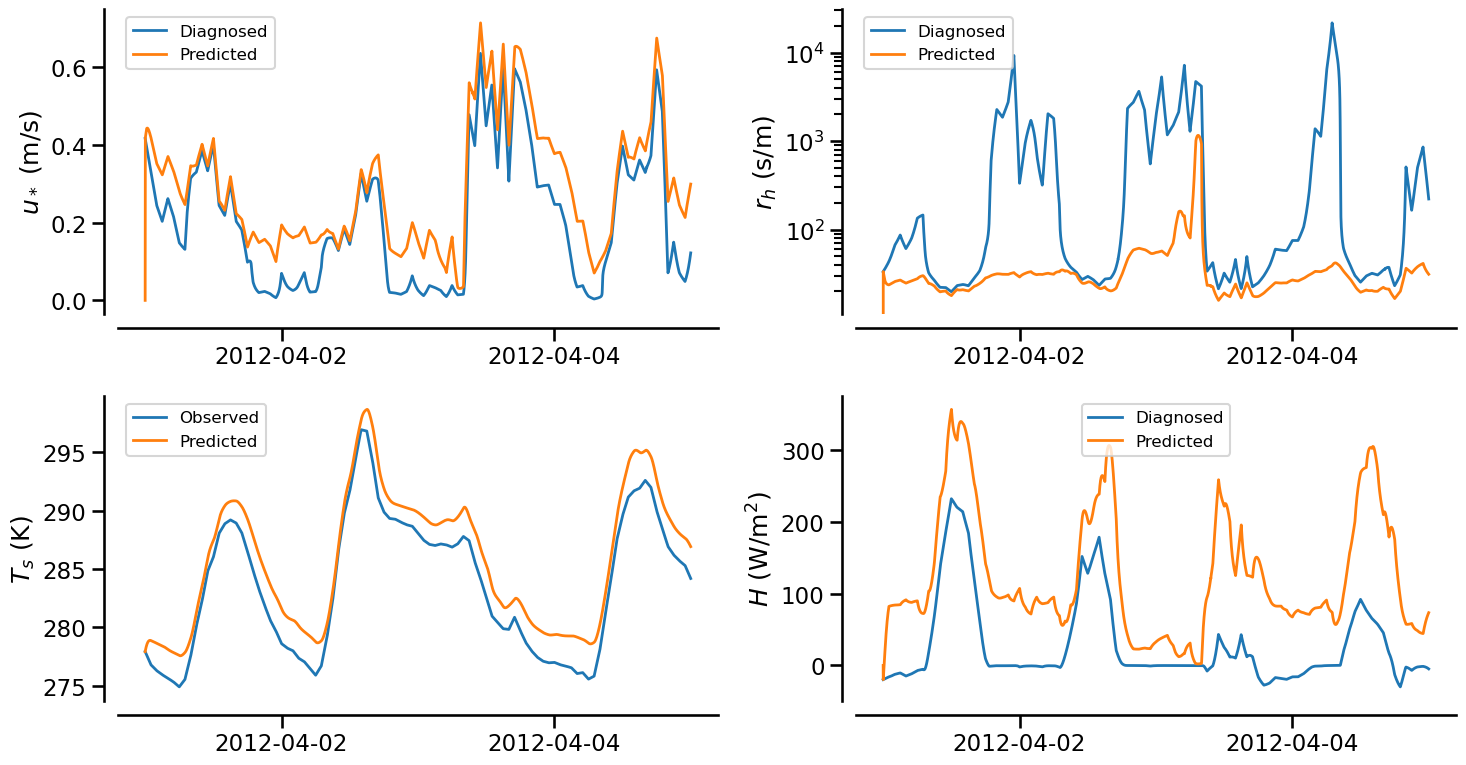

In [17]:
# plot

sns.set_context('talk')
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))

time_info = Ts['time'].values

### Friction velocity
ax[0,0].plot(time_info, diagnosed_ust, linewidth=2, c='C0', label='Diagnosed')
ax[0,0].plot(time_info, predicted_ust, linewidth=2, c='C1', label='Predicted')
ax[0,0].set_ylabel('$u_*$ (m/s)', fontsize=18)
ax[0,0].legend(fontsize=12)

### Aerodynamic resistance
ax[0,1].plot(time_info, diagnosed_rh, linewidth=2, c='C0', label='Diagnosed')
ax[0,1].plot(time_info, predicted_rh, linewidth=2, c='C1', label='Predicted')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('$r_h$ (s/m)', fontsize=18)
ax[0,1].legend(fontsize=12)

### Surface temperature
ax[1,0].plot(time_info, Ts,           linewidth=2, c='C0', label='Observed')
ax[1,0].plot(time_info, predicted_Ts, linewidth=2, c='C1', label='Predicted')
ax[1,0].set_ylabel('$T_s$ (K)', fontsize=18)
ax[1,0].legend(fontsize=12)

### Sensible Heat flux
ax[1,1].plot(time_info, diagnosed_H, linewidth=2, c='C0', label='Diagnosed')
ax[1,1].plot(time_info, predicted_H, linewidth=2, c='C1', label='Predicted')
ax[1,1].set_ylabel('$H$ (W/m$^2$)', fontsize=18)
ax[1,1].legend(fontsize=12)

### properties
for i in range(2):
    for j in range(2):
        ax[i,j].xaxis.set_major_locator(mdates.DayLocator(interval=2))

sns.despine(offset=10)
plt.tight_layout()